<a href="https://colab.research.google.com/github/EneasDavid/Ciencia_de_dados/blob/main/Projeto_de_ciencia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b18a0a0f7e51f090e62ea19347128d56eacd24420e248f136a450b6c06bc04af
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import  GradientBoostingClassifier, GradientBoostingRegressor,  RandomForestRegressor, RandomForestClassifier, HistGradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# hotel

	•	Tipo de hotel (H1 = Hotel Resort ou H2 = Hotel Urbano)
	•	Hotel Urbano: 66%
	•	Hotel Resort: 34%
	•	Válido: 119k (100%)
	•	Sem correspondência: 0 (0%)
	•	Ausente: 0 (0%)
	•	Valores únicos: 2
	•	Mais comum: Hotel Urbano (66%)

# is_canceled

	•	Indica se a reserva foi cancelada (1 para sim, 0 para não)
	•	Não canceladas: 75,166
	•	Canceladas: 44,224
	•	Média: 0,37
	•	Desvio padrão: 0,48
	•	Quantis: mínimo 0, 25% = 0, 50% = 1, 75% = 1, máximo 1

# lead_time

	•	Tempo em dias entre a data de entrada da reserva no PMS e a data de chegada
	•	Média: 104
	•	Desvio padrão: 107
	•	Quantis: mínimo 0, 25% = 18, 50% = 69, 75% = 160, máximo 737

# arrival_date_year

	•	Ano da data de chegada
	•	2015: 21,996
	•	2016: 56,707
	•	2017: 40,687
	•	Média: 2,02k
	•	Desvio padrão: 0,71
	•	Quantis: mínimo 2015, 25% = 2016, 50% = 2016, 75% = 2017, máximo 2017

# arrival_date_month

	•	Mês da data de chegada
	•	Agosto: 12%
	•	Julho: 11%

# stays_in_weekend_nights

	•	Número de noites de final de semana (sábado ou domingo)
	•	Média: 0,93
	•	Desvio padrão: 1
	•	Quantis: mínimo 0, 25% = 0, 50% = 1, 75% = 2, máximo 19

# stays_in_week_nights

	•	Número de noites da semana (segunda a sexta)
	•	Média: 2,5
	•	Desvio padrão: 1,91
	•	Quantis: mínimo 0, 25% = 1, 50% = 2, 75% = 3, máximo 50

# adults

	•	Número de adultos
	•	Média: 1,86
	•	Desvio padrão: 0,58

# children

	•	Número de crianças
	•	Média: 0,1
	•	Desvio padrão: 0,4

# babies

	•	Número de bebês
	•	Média: 0,01
	•	Desvio padrão: 0,1

# meal

	•	Tipo de refeição reservada
	•	BB (café da manhã): 77%
	•	HB (meia pensão): 12%

# country

	•	País de origem
	•	Portugal (PRT): 41%
	•	Reino Unido (GBR): 10%

# market_segment

	•	Segmento de mercado
	•	Agências de viagem online: 47%
	•	Agências de viagem/tour offline: 20%

# distribution_channel

	•	Canal de distribuição
	•	TA/TO (Agências de viagem / Operadoras de turismo): 82%

# is_repeated_guest

	•	Indica se o cliente é repetido (1 para sim, 0 para não)
	•	Não repetidos: 115,580
	•	Repetidos: 3,810
	•	Média: 0,03
	•	Desvio padrão: 0,18

# previous_cancellations

	•	Número de cancelamentos anteriores
	•	Média: 0,09
	•	Desvio padrão: 0,84

# previous_bookings_not_canceled

	•	Número de reservas anteriores que não foram canceladas
	•	Média: 0,23
	•	Desvio padrão: 1,34

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
def inspect_columns(df):
    for column in df.columns:
        missing_count = df[column].isnull().sum()
        total_rows = len(df)
        percentage = (missing_count * 100) / total_rows

        print(f'Feature Name: {column}')
        print(f'Number of missing values: {missing_count} out of {total_rows}')
        print(f'Missing percentage: {percentage:.2f}%')
        print()

In [ ]:
def categorize_columns_by_nulls(df):
    column_lst = list(df.columns)
    mostly_null = []
    partially_null = []
    no_null = []

    total_rows = len(df)  # Obtém o número total de linhas

    for column in column_lst:
        missing_count = df[column].isnull().sum()
        percentage = (missing_count * 100) / total_rows

        if percentage >= 60:
            mostly_null.append(column)
        elif missing_count > 0:
            partially_null.append(column)
        elif missing_count == 0:
            no_null.append(column)

        print(f'Feature Name: {column}')
        print(f'Number of missing values: {missing_count} out of {total_rows}')
        print(f'Missing percentage: {percentage:.2f}%')
        print()

    # Verifica se todas as colunas foram categorizadas
    if len(mostly_null) + len(partially_null) + len(no_null) == len(column_lst):
        print("All columns categorized successfully.")
    else:
        print("Error: Some columns were not categorized.")

    return mostly_null, partially_null, no_null

In [ ]:
def remove_mostly_null_columns(df, mostly_null):
    return df.drop(mostly_null, axis=1)

In [ ]:
def fill_null_with_zero(df, partially_null):
  for i in partially_null:
    df[i] = df[i].fillna(-1)
  return df

In [ ]:
def remove_mostly_null_columns(df, mostly_null):
    return df.drop(mostly_null, axis=1)

In [ ]:
# Função para remover outliers usando o IQR
def remove_outliers(df, mapeamentos):
    if not df.empty:  # Verificando se o DataFrame não está vazio
        # Máscara inicial como todas as linhas válidas
        mask = pd.Series(True, index=df.index)

        # Calculando o IQR para cada coluna numérica
        for coluna in df.select_dtypes(include=['int64', 'float64']).columns:
            if coluna not in mapeamentos:
              if df[coluna].nunique() > 4:  # Ignorar colunas com poucos valores únicos
                Q1 = df[coluna].quantile(0.25)
                Q3 = df[coluna].quantile(0.75)
                IQR = Q3 - Q1

                # Definindo limites inferior e superior para os outliers
                limite_inferior = Q1 - 1.5 * IQR
                limite_superior = Q3 + 1.5 * IQR

                # Calculando a média da coluna
                media_coluna = df[coluna].mean()

                # Verificando a discrepância entre os valores e a média (diferença de até 100)
                mask &= df[coluna].apply(lambda x: abs(x - media_coluna) <= 100)

                # Atualizando a máscara para remover outliers (baseado no IQR)
                mask &= (df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)

        # Aplicando a máscara para filtrar os dados
        df_sem_outliers = df[mask]

        return df_sem_outliers

In [ ]:
def criar_dicionarios_categoricos(df):
    # Dicionário final que armazenará os mapeamentos
    mapeamentos = {}

    # Mapeamento dos meses do ano
    meses_do_ano = {
        'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4,
        'June': 5, 'July': 6, 'August': 7, 'September': 8, 'October': 9,
        'November': 10, 'December': 11
    }

    # Itera pelas colunas do DataFrame
    for coluna in df.columns:
        # Verifica se a coluna é do tipo texto e tem menos de 13 valores únicos
        if df[coluna].dtype == 'object' and df[coluna].nunique() < 13:
            # Se a coluna representa meses, aplica o mapeamento de meses do ano
            if coluna == 'arrival_date_month':
                df[coluna] = df[coluna].map(meses_do_ano)
                mapeamentos[coluna] = meses_do_ano
            else:
                # Cria mapeamento para os valores únicos na coluna
                categorias_unicas = df[coluna].dropna().unique()
                mapeamento_coluna = {categoria: indice for indice, categoria in enumerate(categorias_unicas)}

                # Armazena o mapeamento e aplica a conversão no DataFrame
                mapeamentos[coluna] = mapeamento_coluna
                df[coluna] = df[coluna].map(mapeamento_coluna)

    return mapeamentos, df

In [ ]:
# Função aprimorada para criar dicionários de mapeamento para valores categóricos em um DataFrame
def criar_dicionarios_categoricos(df):
    # Dicionário final que armazenará os mapeamentos
    mapeamentos = {}

    # Mapeamento dos meses do ano
    meses_do_ano = {
        'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4,
        'June': 5, 'July': 6, 'August': 7, 'September': 8, 'October': 9,
        'November': 10, 'December': 11
    }

    # Itera pelas colunas do DataFrame
    for coluna in df.columns:
        # Verifica se a coluna é do tipo texto e tem menos de 13 valores únicos
        if df[coluna].dtype == 'object' and df[coluna].nunique() < 13:
            # Se a coluna representa meses, aplica o mapeamento de meses do ano
            if coluna == 'arrival_date_month':
                df[coluna] = df[coluna].map(meses_do_ano)
                mapeamentos[coluna] = meses_do_ano
            else:
                # Cria mapeamento para os valores únicos na coluna
                categorias_unicas = df[coluna].dropna().unique()
                mapeamento_coluna = {categoria: indice for indice, categoria in enumerate(categorias_unicas)}

                # Armazena o mapeamento e aplica a conversão no DataFrame
                mapeamentos[coluna] = mapeamento_coluna
                df[coluna] = df[coluna].map(mapeamento_coluna)

    return mapeamentos, df

In [ ]:
def inspect_columns(df):
    for column in df.columns:
        missing_count = df[column].isnull().sum()
        total_rows = len(df)
        percentage = (missing_count * 100) / total_rows

        print(f'Feature Name: {column}')
        print(f'Number of missing values: {missing_count} out of {total_rows}')
        print(f'Missing percentage: {percentage:.2f}%')
        print()

In [ ]:
mostly_null, partially_null, no_null = categorize_columns_by_nulls(df)

Feature Name: hotel
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: is_canceled
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: lead_time
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: arrival_date_year
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: arrival_date_month
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: arrival_date_week_number
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: arrival_date_day_of_month
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: stays_in_weekend_nights
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: stays_in_week_nights
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: adults
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Fe

In [ ]:
# Etapa 2: Remover colunas com valores nulos em sua maioria
df=remove_mostly_null_columns(df, mostly_null)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Etapa 3: Preencher os valores nulos parciais com zero
"""
Coloquei -1 porque zero estava sendo usado em outras ocasioes, e executei esse comando por as colunas em especifico não acarrentam tanto assim na predição
"""
df = fill_null_with_zero(df, partially_null)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Etapa 4: Inspecionar as colunas para verificar se ainda há valores nulos
inspect_columns(df)
df.head()

Feature Name: hotel
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: is_canceled
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: lead_time
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: arrival_date_year
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: arrival_date_month
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: arrival_date_week_number
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: arrival_date_day_of_month
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: stays_in_weekend_nights
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: stays_in_week_nights
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Feature Name: adults
Number of missing values: 0 out of 119390
Missing percentage: 0.00%

Fe

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Etapa 5: Normalizar algunas colunas do dataframe
mapeamentos, df = criar_dicionarios_categoricos(df)
df.head()
# Exibindo os dicionários de mapeamento criados

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,6,27,1,0,0,2,...,3,0,-1.0,0,0,0.0,0,0,0,2015-07-01
1,0,0,737,2015,6,27,1,0,0,2,...,4,0,-1.0,0,0,0.0,0,0,0,2015-07-01
2,0,0,7,2015,6,27,1,0,1,1,...,0,0,-1.0,0,0,75.0,0,0,0,2015-07-02
3,0,0,13,2015,6,27,1,0,1,1,...,0,0,304.0,0,0,75.0,0,0,0,2015-07-02
4,0,0,14,2015,6,27,1,0,2,2,...,0,0,240.0,0,0,98.0,0,1,0,2015-07-03


In [ ]:
mapeamentos['children'] = {}
mapeamentos['adults'] = {}
mapeamentos['babies'] = {}
mapeamentos['is_repeated_guest'] = {}
mapeamentos['is_canceled'] = {}

In [ ]:
mapeamentos

{'hotel': {'Resort Hotel': 0, 'City Hotel': 1},
 'arrival_date_month': {'January': 0,
  'February': 1,
  'March': 2,
  'April': 3,
  'May': 4,
  'June': 5,
  'July': 6,
  'August': 7,
  'September': 8,
  'October': 9,
  'November': 10,
  'December': 11},
 'meal': {'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4},
 'market_segment': {'Direct': 0,
  'Corporate': 1,
  'Online TA': 2,
  'Offline TA/TO': 3,
  'Complementary': 4,
  'Groups': 5,
  'Undefined': 6,
  'Aviation': 7},
 'distribution_channel': {'Direct': 0,
  'Corporate': 1,
  'TA/TO': 2,
  'Undefined': 3,
  'GDS': 4},
 'reserved_room_type': {'C': 0,
  'A': 1,
  'D': 2,
  'E': 3,
  'G': 4,
  'F': 5,
  'H': 6,
  'L': 7,
  'P': 8,
  'B': 9},
 'assigned_room_type': {'C': 0,
  'A': 1,
  'D': 2,
  'E': 3,
  'G': 4,
  'F': 5,
  'I': 6,
  'B': 7,
  'H': 8,
  'P': 9,
  'L': 10,
  'K': 11},
 'deposit_type': {'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2},
 'customer_type': {'Transient': 0,
  'Contract': 1,
  'Transient-Party': 2,
  

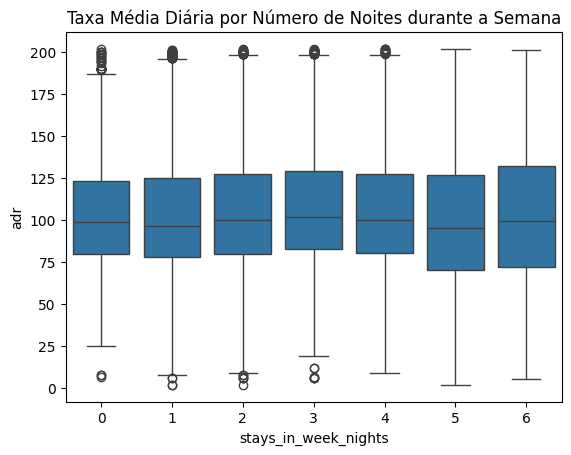

In [ ]:
# Etapa 6: Remover os outliers do dataframe
df=remove_outliers(df,mapeamentos)

sns.boxplot(data=df, x='stays_in_week_nights', y='adr')
plt.title('Taxa Média Diária por Número de Noites durante a Semana')
plt.show()

In [ ]:
# Filtrando os dados para remover reservas canceladas
df_filtrado = df[df['is_canceled'] == 0]

<ipython-input-83-d56920e43d2e>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='hotel', y='days_in_waiting_list', estimator='mean', ci=None, palette='pastel')
<ipython-input-83-d56920e43d2e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='hotel', y='days_in_waiting_list', estimator='mean', ci=None, palette='pastel')
<ipython-input-83-d56920e43d2e>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([inverted_mapeamentos_hotel.get(int(label), label) for label in ax.get_xticks()], rotation=0)


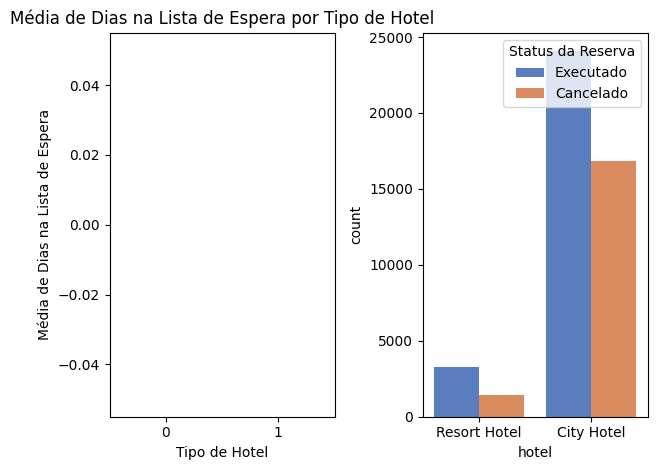

In [ ]:
# Garantir que 'hotel' é tratado como categoria
df['hotel'] = df['hotel'].astype('category')


# Gráfico 1: Dias de Espera por Tipo de Hotel
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='hotel', y='days_in_waiting_list', estimator='mean', ci=None, palette='pastel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Média de Dias na Lista de Espera')
plt.title('Média de Dias na Lista de Espera por Tipo de Hotel')

# Gráfico 2: Contagem de Cancelamentos por Tipo de Hotel
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x='hotel', hue='is_canceled', palette='muted')

# Ajustando os rótulos do eixo X usando o dicionário de mapeamento (caso exista)
inverted_mapeamentos_hotel = {v: k for k, v in mapeamentos['hotel'].items()} if 'mapeamentos' in globals() else None
if inverted_mapeamentos_hotel:
    ax.set_xticklabels([inverted_mapeamentos_hotel.get(int(label), label) for label in ax.get_xticks()], rotation=0)

# Ajustando a legenda para exibir os rótulos personalizados
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Executado', 'Cancelado']  # Novos rótulos para a legenda
ax.legend(handles, new_labels, title='Status da Reserva')

# Ajuste do layout para evitar sobreposição
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Quantidade de Reservas')

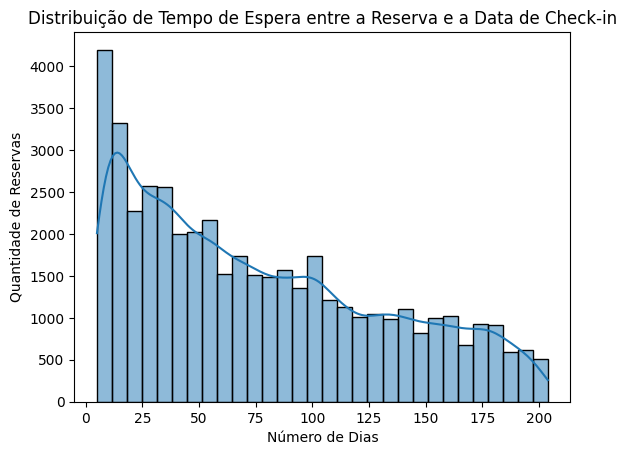

In [ ]:
# Gráfico 1: Distribuição de lead_time
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Distribuição de Tempo de Espera entre a Reserva e a Data de Check-in')
plt.xlabel('Número de Dias')
plt.ylabel('Quantidade de Reservas')

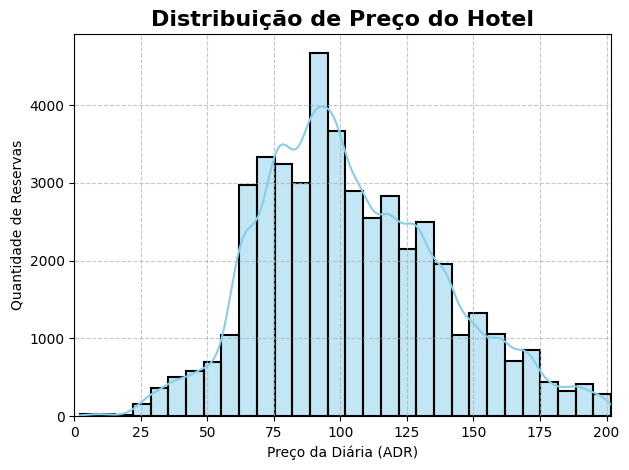

In [ ]:
# Encontrando o valor máximo de ADR
max_adr = df['adr'].max()

# Ajustando o limite superior do eixo x
plt.xlim(0, max_adr)

sns.histplot(df['adr'], bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1.5)
plt.title('Distribuição de Preço do Hotel', fontsize=16, fontweight='bold')
plt.xlabel('Preço da Diária (ADR)')
plt.ylabel('Quantidade de Reservas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-29-a16f66b2f46a>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([inverted_mapeamentos_hotel[int(label)] for label in ax.get_xticks()], rotation=0)


Text(0, 0.5, 'Número de Reservas')

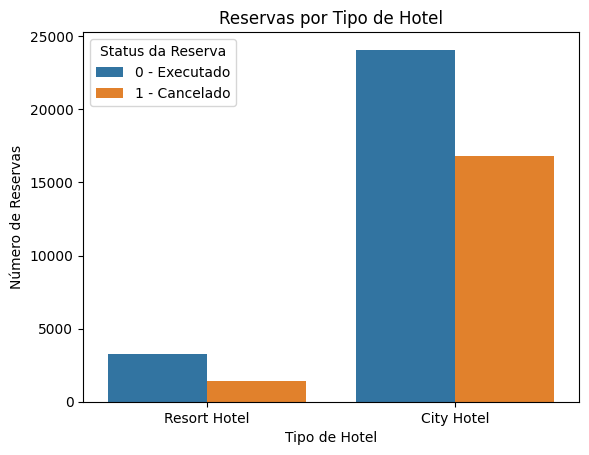

In [ ]:
# Gráfico 2: Contagem de reservas por tipo de hotel com status de cancelamento
ax = sns.countplot(data=df, x='hotel', hue='is_canceled')

# Alterando os rótulos do eixo X usando o dicionário de mapeamento
# Obtenha a inversão do dicionário para mapear valores para chaves
inverted_mapeamentos_hotel = {v: k for k, v in mapeamentos['hotel'].items()}

# Alterando os rótulos do eixo X
ax.set_xticklabels([inverted_mapeamentos_hotel[int(label)] for label in ax.get_xticks()], rotation=0)

# Ajustando a legenda para exibir os rótulos personalizados
handles, labels = ax.get_legend_handles_labels()
new_labels = ['0 - Executado', '1 - Cancelado']  # Novos rótulos para a legenda
ax.legend(handles, new_labels, title='Status da Reserva')

plt.title('Reservas por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Número de Reservas')

<ipython-input-30-eaef64de40d8>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)  # Rotacionando os rótulos em 90 graus


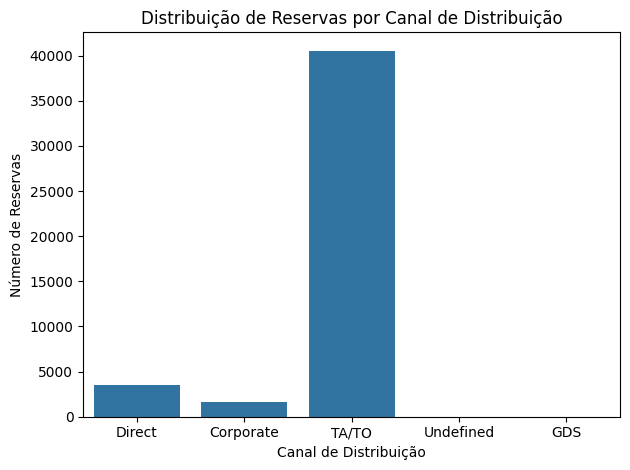

'\nTA/TO = Agências de viagem / Operadoras de turismo\nDirect = Direct\nCorporate = Corporate\nGDS = Agências de viagem online\n'

In [ ]:
# Criando o gráfico de barras
ax = sns.barplot(x=df['distribution_channel'].value_counts().sort_index().index,
                 y=df['distribution_channel'].value_counts().sort_index().values)

# Alterando os rótulos do eixo X usando o dicionário de mapeamento
inverted_mapeamentos_canal = {v: k for k, v in mapeamentos['distribution_channel'].items()}
new_labels = [inverted_mapeamentos_canal.get(int(label), label) for label in ax.get_xticks()]

# Ajustando os rótulos no eixo X
ax.set_xticklabels(new_labels)  # Rotacionando os rótulos em 90 graus

# Títulos e rótulos
ax.set_title('Distribuição de Reservas por Canal de Distribuição')
ax.set_xlabel('Canal de Distribuição')
ax.set_ylabel('Número de Reservas')

# Exibindo o gráfico
plt.tight_layout()  # Ajusta automaticamente o layout
plt.show()

'''
TA/TO = Agências de viagem / Operadoras de turismo
Direct = Direct
Corporate = Corporate
GDS = Agências de viagem online
'''

<ipython-input-31-34c174c00e32>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([inverted_mapeamentos_hotel[int(label)] for label in ax.get_xticks()])


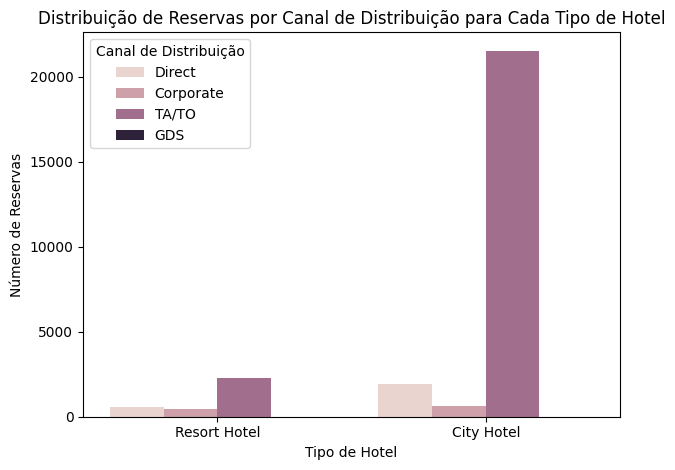

In [ ]:
# Agrupando os dados por tipo de hotel e canal de distribuição
grouped_data = df_filtrado.groupby(['hotel', 'distribution_channel']).size().reset_index(name='reservas')

# Criando o gráfico de barras
ax = sns.barplot(data=grouped_data, x='hotel', y='reservas', hue='distribution_channel')

# Alterando os rótulos do eixo X (hotel) e da legenda (distribution_channel)
ax.set_xticklabels([inverted_mapeamentos_hotel[int(label)] for label in ax.get_xticks()])
handles, labels = ax.get_legend_handles_labels()
new_labels = [inverted_mapeamentos_canal[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Canal de Distribuição')

# Títulos e rótulos
ax.set_title('Distribuição de Reservas por Canal de Distribuição para Cada Tipo de Hotel')
ax.set_xlabel('Tipo de Hotel')
ax.set_ylabel('Número de Reservas')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

1


<ipython-input-32-f02384fffda9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_non_canceled.groupby(['hotel', 'is_repeated_guest']).size().reset_index(name='reservas')
<ipython-input-32-f02384fffda9>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([inverted_mapeamentos_hotel[int(label)] for label in ax.get_xticks()])


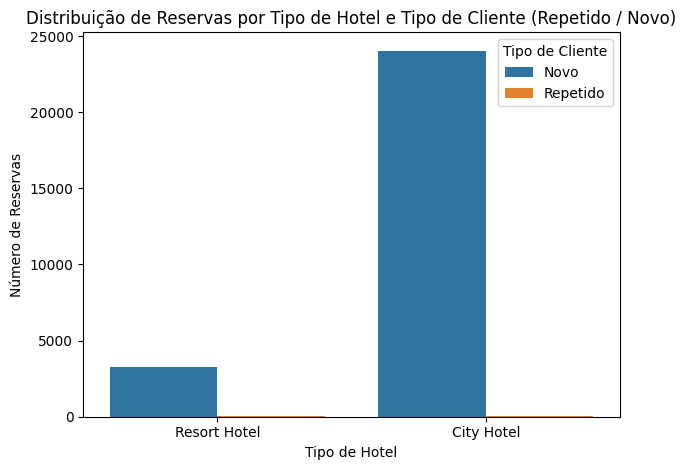

In [ ]:

print(df['is_repeated_guest'].max())
# Filtrando as reservas não canceladas
df_non_canceled = df[df['is_canceled'] == 0]

# Agrupando os dados por tipo de hotel e se o cliente é repetido ou novo
grouped_data = df_non_canceled.groupby(['hotel', 'is_repeated_guest']).size().reset_index(name='reservas')

# Mapeando os valores de 'is_repeated_guest' para 'Repetido' e 'Novo'
grouped_data['is_repeated_guest'] = grouped_data['is_repeated_guest'].map({0: 'Novo', 1: 'Repetido'})

# Criando o gráfico de barras
ax = sns.barplot(data=grouped_data, x='hotel', y='reservas', hue='is_repeated_guest')

# Alterando os rótulos do eixo X (hotel)
ax.set_xticklabels([inverted_mapeamentos_hotel[int(label)] for label in ax.get_xticks()])

# Títulos e rótulos
ax.set_title('Distribuição de Reservas por Tipo de Hotel e Tipo de Cliente (Repetido / Novo)')
ax.set_xlabel('Tipo de Hotel')
ax.set_ylabel('Número de Reservas')

# Ajustando a legenda
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Novo', 'Repetido']
ax.legend(handles, new_labels, title='Tipo de Cliente')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

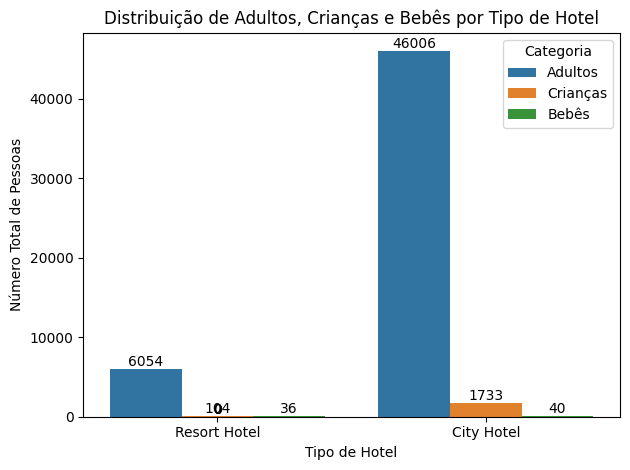

In [ ]:
# Agrupando os dados por tipo de hotel e somando as categorias de adultos, crianças e bebês
grouped_data = df_filtrado.groupby(['hotel']).agg(
    adultos=('adults', 'sum'),
    criancas=('children', 'sum'),
    bebes=('babies', 'sum')
).reset_index()

# Plotando os valores de adultos, crianças e bebês (usando melt para reformatar os dados)
melted_data = grouped_data.melt(id_vars=['hotel'], value_vars=['adultos', 'criancas', 'bebes'],
                                 var_name='Categoria', value_name='Número de Pessoas')

# Criando o gráfico de barras baseado na soma total dos valores
sns.barplot(data=melted_data, x='hotel', y='Número de Pessoas', hue='Categoria')

# Ajustando os rótulos e títulos
plt.title('Distribuição de Adultos, Crianças e Bebês por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Número Total de Pessoas')

# Alterando os rótulos do eixo X usando o mapeamento do tipo de hotel
plt.xticks(ticks=plt.gca().get_xticks(), labels=[inverted_mapeamentos_hotel.get(int(label), str(label)) for label in plt.gca().get_xticks()])

# Ajustando a legenda
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Adultos', 'Crianças', 'Bebês']
plt.legend(handles, new_labels, title='Categoria')

# Adicionando os rótulos de quantidade sobre as barras
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

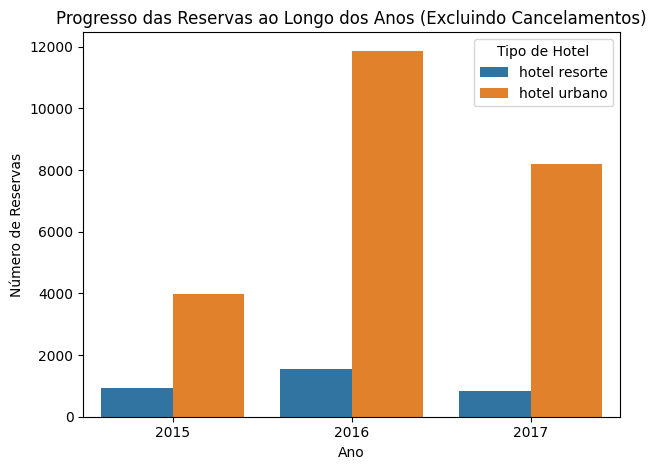

In [ ]:
# Contando as reservas por ano e tipo de hotel
reservas_por_ano_hotel = df_filtrado.groupby(['arrival_date_year', 'hotel']).size().reset_index(name='reservas')

# Criando o gráfico de barras com a separação por tipo de hotel
ax = sns.barplot(data=reservas_por_ano_hotel, x='arrival_date_year', y='reservas', hue='hotel')

# Ajustando a legenda com base no mapeamento de hotel
handles, labels = ax.get_legend_handles_labels()

# Aplicando o mapeamento dos rótulos da legenda usando o dicionário inverted_mapeamentos_hotel
new_labels = ['hotel resorte', 'hotel urbano']
ax.legend(handles, new_labels, title='Tipo de Hotel')

# Mantendo os rótulos do eixo X como anos (não fazendo ajustes para o eixo X)
plt.title('Progresso das Reservas ao Longo dos Anos (Excluindo Cancelamentos)')
plt.xlabel('Ano')
plt.ylabel('Número de Reservas')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

<ipython-input-35-b2997c9aae2b>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([inverted_mapeamentos_mes.get(int(label), str(label)) for label in ax.get_xticks()], rotation=45)


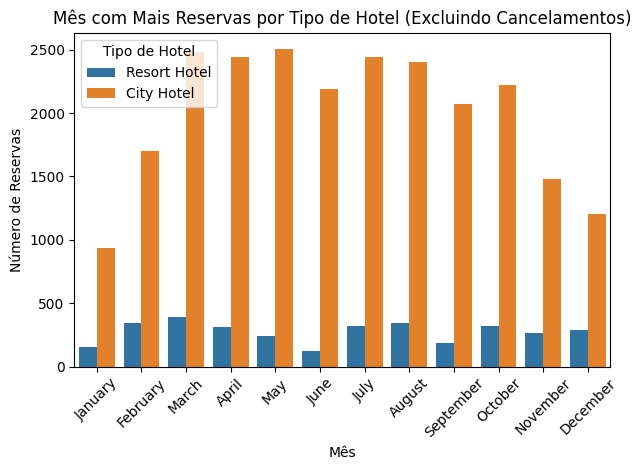

In [ ]:
# Contando as reservas por mês e tipo de hotel
reservas_por_mes_hotel = df_filtrado.groupby(['arrival_date_month', 'hotel']).size().reset_index(name='reservas')

# Criando o gráfico de barras com a separação por tipo de hotel
ax = sns.barplot(data=reservas_por_mes_hotel, x='arrival_date_month', y='reservas', hue='hotel')

# Aplicando o mapeamento dos meses nos rótulos do eixo X
inverted_mapeamentos_mes = {v: k for k, v in mapeamentos['arrival_date_month'].items()}
ax.set_xticklabels([inverted_mapeamentos_mes.get(int(label), str(label)) for label in ax.get_xticks()], rotation=45)

# Ajustando a legenda com base no mapeamento de hotel
handles, labels = ax.get_legend_handles_labels()

# Aplicando o mapeamento dos rótulos da legenda usando o dicionário inverted_mapeamentos_hotel
new_labels = [inverted_mapeamentos_hotel.get(int(label), str(label)) for label in labels]
plt.legend(handles, new_labels, title='Tipo de Hotel')

# Adicionando título e rótulos aos eixos
plt.title('Mês com Mais Reservas por Tipo de Hotel (Excluindo Cancelamentos)')
plt.xlabel('Mês')
plt.ylabel('Número de Reservas')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

<ipython-input-36-3787e4977815>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['is_weekend'] = df_filtrado['stays_in_weekend_nights'] > 0  # Reservas que ocorreram no fim de semana


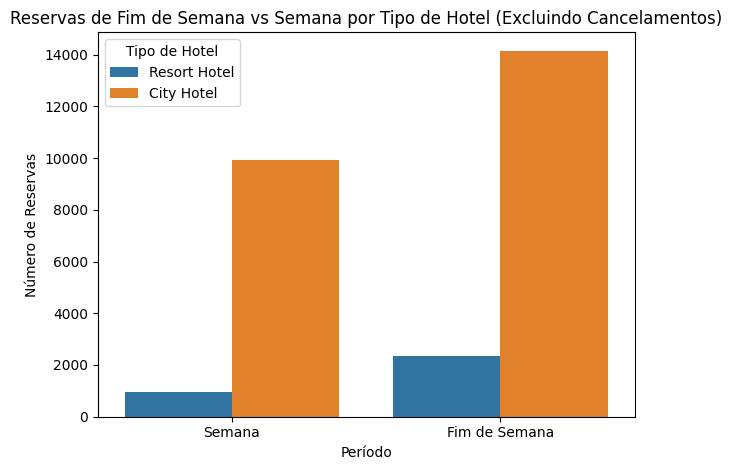

In [ ]:
# Contando as reservas por tipo de hotel e se é fim de semana ou durante a semana
# Agrupando as colunas stays_in_weekend_nights (para fim de semana) e stays_in_week_nights (para semana)
df_filtrado['is_weekend'] = df_filtrado['stays_in_weekend_nights'] > 0  # Reservas que ocorreram no fim de semana

# Criando um DataFrame separado para as reservas de fim de semana e durante a semana
reservas_fim_semana = df_filtrado.groupby(['is_weekend', 'hotel']).size().reset_index(name='reservas')

# Convertendo 'is_weekend' para texto para facilitar a leitura
reservas_fim_semana['is_weekend'] = reservas_fim_semana['is_weekend'].map({True: 'Fim de Semana', False: 'Semana'})

# Criando o gráfico de barras com a separação por tipo de hotel
sns.barplot(data=reservas_fim_semana, x='is_weekend', y='reservas', hue='hotel')

# Ajustando a legenda com base no mapeamento de hotel
handles, labels = plt.gca().get_legend_handles_labels()

# Aplicando o mapeamento dos rótulos da legenda usando o dicionário inverted_mapeamentos_hotel
new_labels = [inverted_mapeamentos_hotel.get(int(label), str(label)) for label in labels]
plt.legend(handles, new_labels, title='Tipo de Hotel')

# Adicionando título e rótulos aos eixos
plt.title('Reservas de Fim de Semana vs Semana por Tipo de Hotel (Excluindo Cancelamentos)')
plt.xlabel('Período')
plt.ylabel('Número de Reservas')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

<ipython-input-37-76c65ffc59c0>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([inverted_mapeamentos_tipo_quarto.get(label, str(label)) for label in plt.gca().get_xticks()])


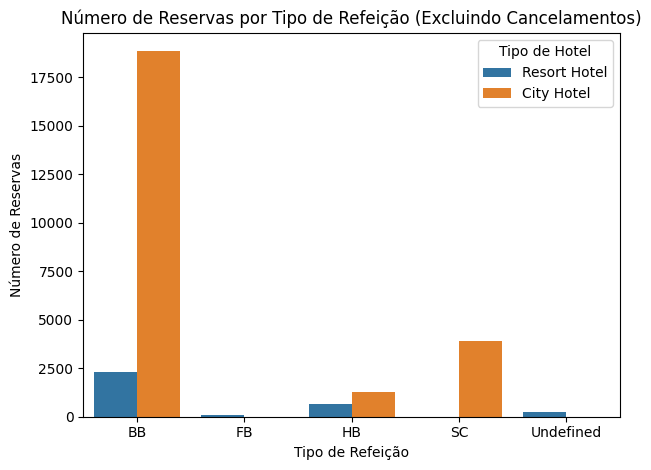

'\nIndefinido/SC – sem pacote refeição;\nBB – Alojamento e café da manhã;\nMP – Meia Pensão (café da manhã e mais uma refeição – geralmente jantar);\nFB – Pensão completa (café da manhã, almoço e jantar)\n\n'

In [ ]:
# Agrupando os dados por tipo de refeição e tipo de hotel
reservas_quarto_hotel = df_filtrado.groupby(['meal', 'hotel']).size().reset_index(name='reservas')

# Criando o gráfico de barras com a separação por tipo de hotel
sns.barplot(data=reservas_quarto_hotel, x='meal', y='reservas', hue='hotel')

# Invertendo o mapeamento para os tipos de refeição
inverted_mapeamentos_tipo_quarto = {v: k for k, v in mapeamentos['meal'].items()}

# Ajustando os rótulos do eixo X com base no mapeamento de tipos de refeição
# Aqui, pegamos o rótulo do eixo X diretamente com plt.gca().get_xticks()
plt.gca().set_xticklabels([inverted_mapeamentos_tipo_quarto.get(label, str(label)) for label in plt.gca().get_xticks()])

# Ajustando a legenda com base no mapeamento de hotel
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [inverted_mapeamentos_hotel.get(int(label), str(label)) for label in labels]
plt.legend(handles, new_labels, title='Tipo de Hotel')

# Adicionando título e rótulos aos eixos
plt.title('Número de Reservas por Tipo de Refeição (Excluindo Cancelamentos)')
plt.xlabel('Tipo de Refeição')
plt.ylabel('Número de Reservas')

# Exibindo o gráfico
plt.tight_layout()
plt.show()
'''
Indefinido/SC – sem pacote refeição;
BB – Alojamento e café da manhã;
MP – Meia Pensão (café da manhã e mais uma refeição – geralmente jantar);
FB – Pensão completa (café da manhã, almoço e jantar)

'''

O foco deve ser aumentar o rendimento, então o vou analisar as relações discrepentes entre cancelamentos e confirmação no tocante aos servições adicionais e em serviços que ainda não estão descritos na tabela, para assim captar os clientes

<ipython-input-38-ed2ba1a72229>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([inverted_mapeamentos_tipo_quarto.get(label, str(label)) for label in reservas_quarto_hotel['Room_Type'].unique()])


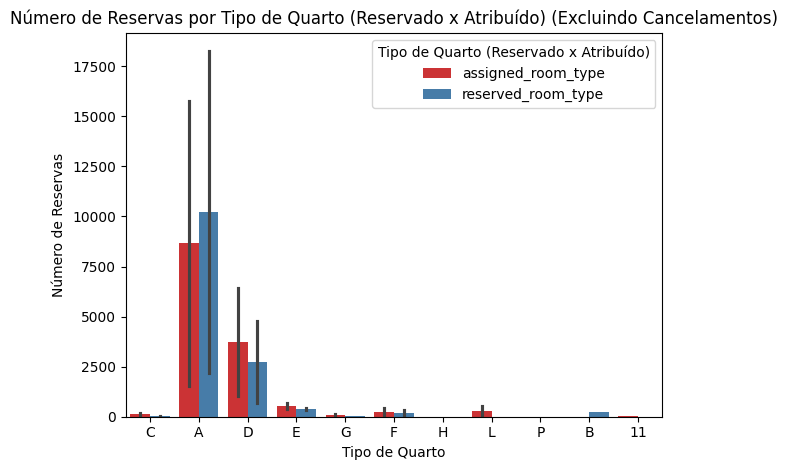

In [ ]:
# Organizando os dados para mostrar tanto o tipo de quarto reservado quanto o atribuído
reservas_quarto_hotel = df_filtrado.melt(
    id_vars=['hotel'],
    value_vars=['reserved_room_type', 'assigned_room_type'],
    var_name='Tipo_Quarto',
    value_name='Room_Type'
)

# Contando o número de reservas para cada combinação de hotel e tipo de quarto
reservas_quarto_hotel = reservas_quarto_hotel.groupby(['Room_Type', 'hotel', 'Tipo_Quarto']).size().reset_index(name='reservas')

# Criando o gráfico de barras com a separação por tipo de hotel e tipo de quarto (reservado ou atribuído)
sns.barplot(data=reservas_quarto_hotel, x='Room_Type', y='reservas', hue='Tipo_Quarto', palette="Set1")

# Invertendo o mapeamento para os tipos de quarto
inverted_mapeamentos_tipo_quarto = {v: k for k, v in mapeamentos['reserved_room_type'].items()}

# Ajustando os rótulos do eixo X com base no mapeamento de tipos de quarto
plt.gca().set_xticklabels([inverted_mapeamentos_tipo_quarto.get(label, str(label)) for label in reservas_quarto_hotel['Room_Type'].unique()])

# Ajustando a legenda com base no mapeamento de hotel
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Tipo de Quarto (Reservado x Atribuído)')

# Adicionando título e rótulos aos eixos
plt.title('Número de Reservas por Tipo de Quarto (Reservado x Atribuído) (Excluindo Cancelamentos)')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Número de Reservas')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

<ipython-input-39-f276fbafe746>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelamentos_por_hotel = df_cancelado.groupby('hotel').size().reset_index(name='cancelamentos')
<ipython-input-39-f276fbafe746>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([inverted_mapeamentos_tipo_quarto.get(label, str(label)) for label in hotel_mais_reservou['reserved_room_type']])
<ipython-input-39-f276fbafe746>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancelamentos_por_hotel, x='hotel', y='cancelamentos', ax=axes[1], palette='Set2')
<ipyt

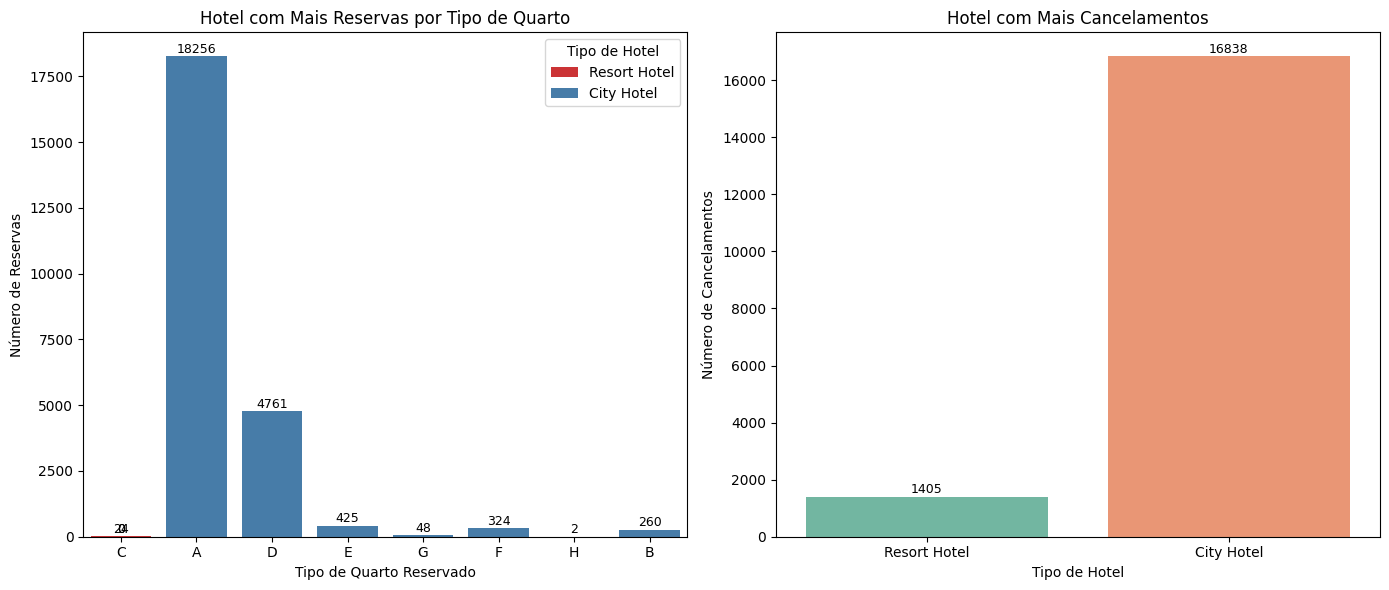

In [ ]:
# Agrupando e contando as reservas por tipo de quarto e tipo de hotel
reservas_por_quarto = df_filtrado.groupby(['hotel', 'reserved_room_type']).size().reset_index(name='reservas')

# Encontrando o hotel que mais reservou cada tipo de quarto
hotel_mais_reservou = reservas_por_quarto.loc[reservas_por_quarto.groupby('reserved_room_type')['reservas'].idxmax()]

# Filtrando o hotel que teve mais cancelamentos
df_cancelado = df[df['is_canceled'] == 1]
cancelamentos_por_hotel = df_cancelado.groupby('hotel').size().reset_index(name='cancelamentos')

# Configurando o layout para os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Hotel com mais reservas por tipo de quarto
sns.barplot(data=hotel_mais_reservou, x='reserved_room_type', y='reservas', hue='hotel', ax=axes[0], palette='Set1')

# Ajuste de rótulos e mapeamento do eixo X para tipo de quarto reservado
axes[0].set_xticklabels([inverted_mapeamentos_tipo_quarto.get(label, str(label)) for label in hotel_mais_reservou['reserved_room_type']])

# Ajustando a legenda com mapeamento de hotel
handles, labels = axes[0].get_legend_handles_labels()
new_labels = [inverted_mapeamentos_hotel.get(int(label), str(label)) for label in labels]
axes[0].legend(handles, new_labels, title='Tipo de Hotel')

# Título e rótulos para o gráfico de reservas por tipo de quarto
axes[0].set_title('Hotel com Mais Reservas por Tipo de Quarto')
axes[0].set_xlabel('Tipo de Quarto Reservado')
axes[0].set_ylabel('Número de Reservas')

# Adicionando rótulos de valor sobre as barras
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     fontsize=9, color='black',
                     xytext=(0, 5), textcoords='offset points')

# Gráfico 2: Hotel com mais cancelamentos
sns.barplot(data=cancelamentos_por_hotel, x='hotel', y='cancelamentos', ax=axes[1], palette='Set2')

# Ajuste de rótulos do eixo X para hotel no gráfico de cancelamentos
axes[1].set_xticklabels([inverted_mapeamentos_hotel.get(label, str(label)) for label in cancelamentos_por_hotel['hotel']])

# Título e rótulos para o gráfico de cancelamentos
axes[1].set_title('Hotel com Mais Cancelamentos')
axes[1].set_xlabel('Tipo de Hotel')
axes[1].set_ylabel('Número de Cancelamentos')

# Adicionando rótulos de valor sobre as barras
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     fontsize=9, color='black',
                     xytext=(0, 5), textcoords='offset points')

# Ajustando layout
plt.tight_layout()
plt.show()

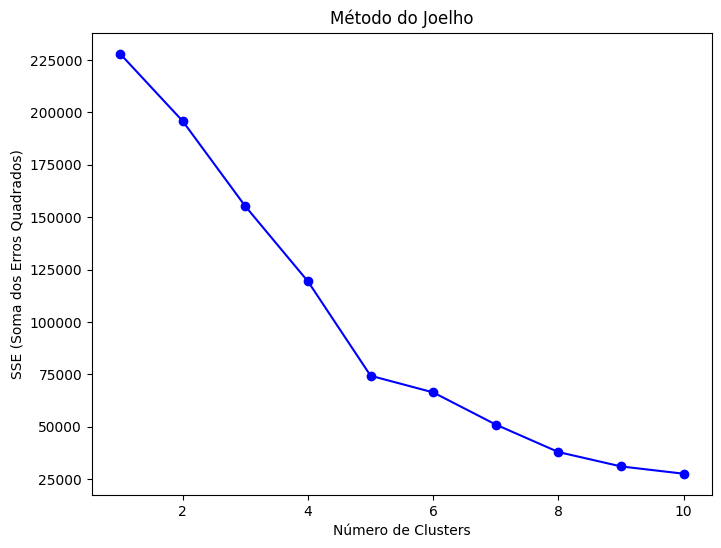

In [ ]:
# Colunas de interesse
colunas_de_interesse = ['hotel', 'stays_in_week_nights', 'stays_in_weekend_nights', 'children', 'babies']

# Selecionando as colunas de interesse
df_interesse = df[colunas_de_interesse]

# Normalizando os dados (opcional)
scaler = StandardScaler()
df_normalizado = scaler.fit_transform(df_interesse)

# Método do joelho para determinar o número ideal de clusters
sse = []
k_range = range(1, 11)  # Tentar de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalizado)
    sse.append(kmeans.inertia_)

# Plotando o gráfico do método do joelho
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b')
plt.title('Método do Joelho')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE (Soma dos Erros Quadrados)')
plt.show()

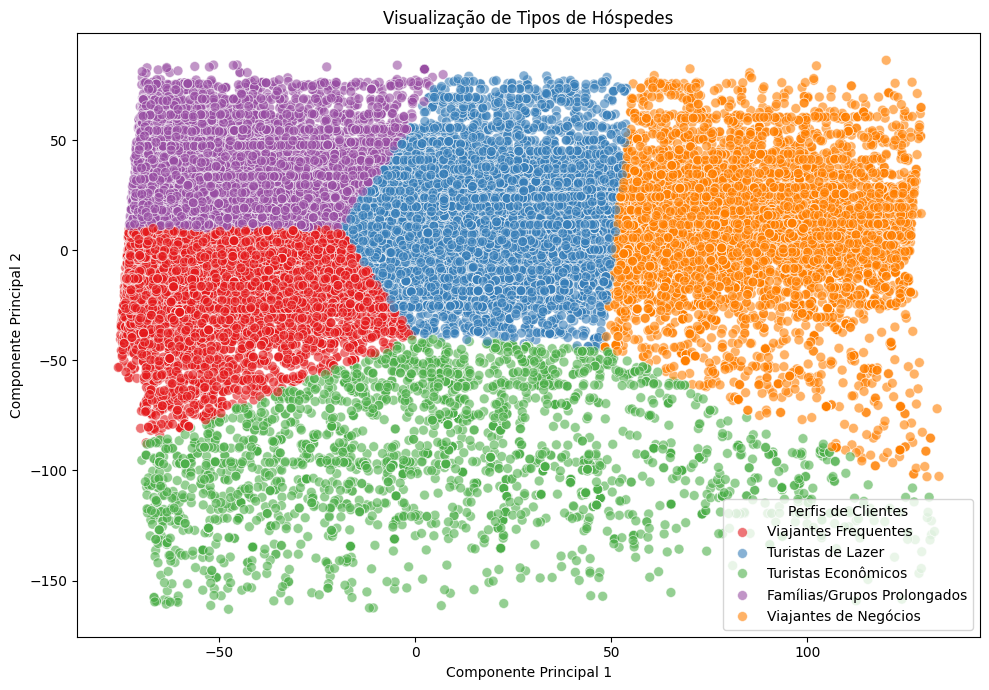

In [ ]:
# Selecionando apenas colunas numéricas para o PCA
df_segment_numeric = df.select_dtypes(include=['number'])

# Reduzindo o dataframe para 2 componentes principais para visualização
pca = PCA(n_components=2)
df_segment_pca = pca.fit_transform(df_segment_numeric)

# Definindo o número ideal de clusters (ajustado com base no método Elbow)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Aplicando o KMeans e criando a coluna 'Cluster'
df['Cluster'] = kmeans.fit_predict(df_segment_pca)

# Criando o mapeamento dinâmico de clusters interpretados
cluster_mapping = {
    0: 'Viajantes Frequentes',
    1: 'Turistas de Lazer',
    2: 'Famílias/Grupos Prolongados',
    3: 'Viajantes de Negócios',
    4: 'Turistas Econômicos'
}

df['Cluster_Interpretado'] = df['Cluster'].map(cluster_mapping)

# Gráfico de dispersão com clusters interpretados
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df_segment_pca[:, 0], y=df_segment_pca[:, 1],
    hue=df['Cluster_Interpretado'], palette='Set1', s=50, alpha=0.6
)

# Configurações do gráfico
plt.title('Visualização de Tipos de Hóspedes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Perfis de Clientes')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45603 entries, 2 to 119388
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           45603 non-null  object 
 1   is_canceled                     45603 non-null  int64  
 2   lead_time                       45603 non-null  int64  
 3   arrival_date_year               45603 non-null  int64  
 4   arrival_date_month              45603 non-null  int64  
 5   arrival_date_week_number        45603 non-null  int64  
 6   arrival_date_day_of_month       45603 non-null  int64  
 7   stays_in_weekend_nights         45603 non-null  int64  
 8   stays_in_week_nights            45603 non-null  int64  
 9   adults                          45603 non-null  int64  
 10  children                        45603 non-null  float64
 11  babies                          45603 non-null  int64  
 12  meal                            4560

hotel                           

é_cancelado
                     
tempo de espera     

chegada_data_ano  

chegada_data_mês

chegada_data_semana_número        
  
data_de_chegada_dia_do_mês  

estadias_em_weekend_nights    

estadias_em_noites_semana   

adultos                          

crianças                        

bebês                           

refeição                            

país

mercado_segmento

distribuição_canal

convidado_repetido

cancelamentos_anteriores

reservas_anteriores_não_canceladas  

tipo_de_quarto_reservado

tipo_de_quarto_atribuído

reservas_alterações                 

tipo_depósito                    

agente                           

dias_em_lista_de_espera            

endereço_tipo_de_cliente                             

espaços_de_estacionamento_de_carro_requerido

total_de_req_especial

convidados       

status_reserva              

reserva_status_data

Para a coluna 'hotel':

Para a coluna 'stays_in_week_nights':
  Valor máximo: 6
  Valor mínimo: 0

Para a coluna 'stays_in_weekend_nights':
  Valor máximo: 4
  Valor mínimo: 0

Para a coluna 'children':
  Valor máximo: 3.0
  Valor mínimo: 0.0

Para a coluna 'babies':
  Valor máximo: 1
  Valor mínimo: 0



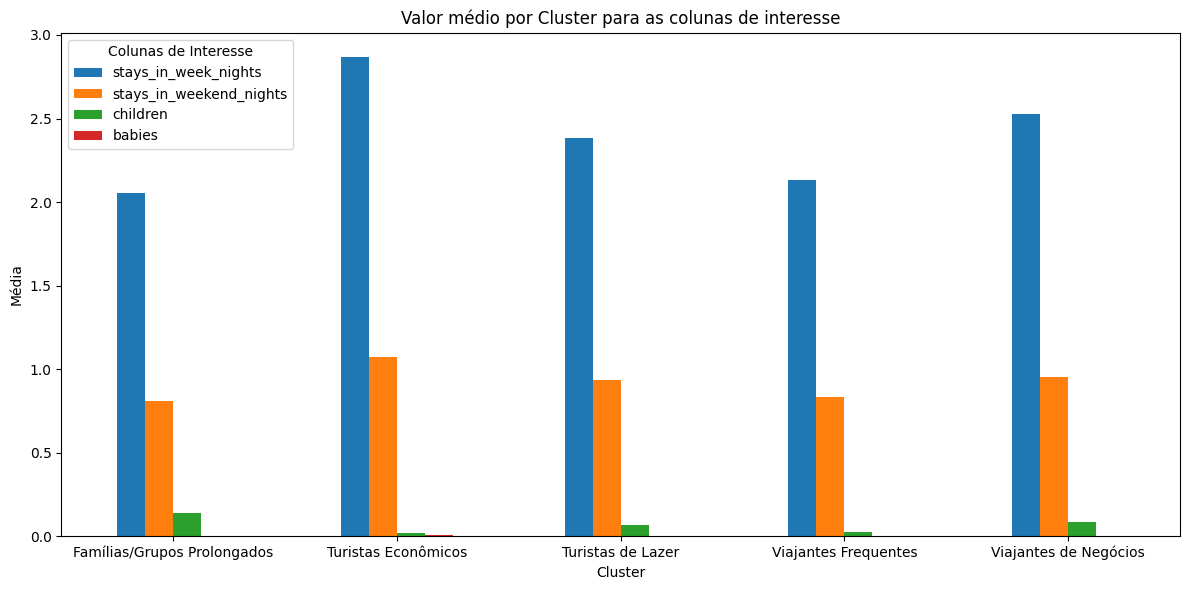

<ipython-input-45-e49b1c728517>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([inverted_mapeamentos_hotel[int(label)] for label in ax.get_xticks()], rotation=0)


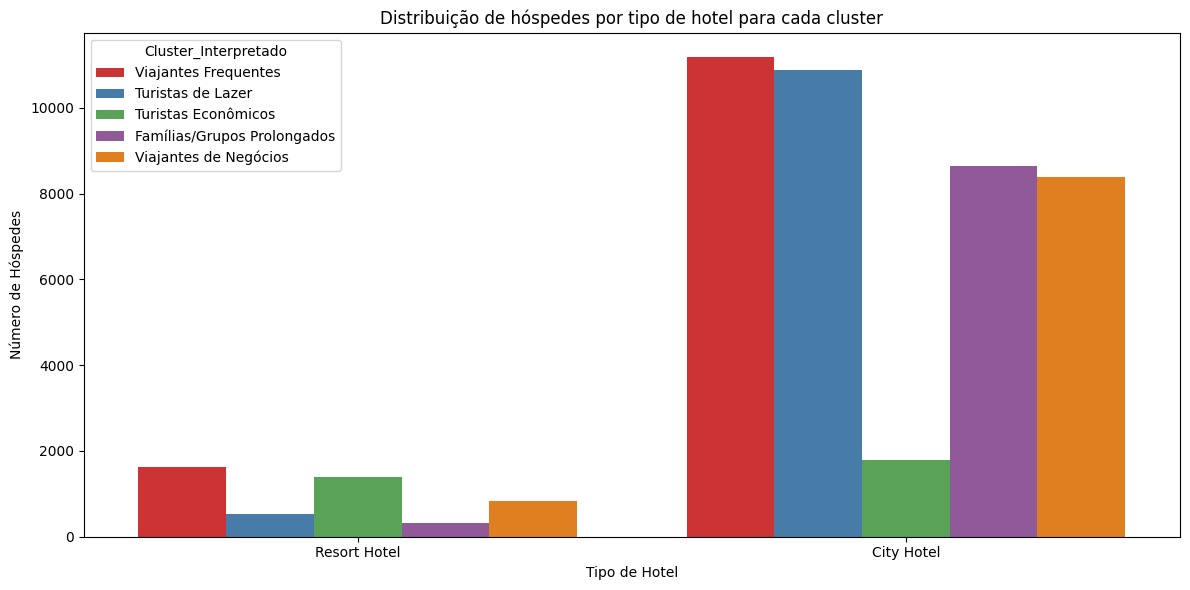

In [ ]:
# 1. Imprimindo os valores máximos e mínimos para cada coluna de interesse
for col in colunas_de_interesse:
    print(f"Para a coluna '{col}':")

    if col != 'hotel':  # Ignorando a coluna 'hotel', pois será tratada separadamente
        print(f"  Valor máximo: {df[col].max()}")

        # Se o valor mínimo for zero, ajustamos para não mostrar zero
        print(f"  Valor mínimo: {df[col].min() if df[col].min() >= 0 else df[col].min() + 1}")

    print()  # Linha em branco para melhor visualização

# 2. Calculando a média por Cluster_Interpretado (considerando apenas colunas numéricas)
numerical_cols = df[colunas_de_interesse].select_dtypes(include=['number']).columns
mean_values_by_cluster = df.groupby('Cluster_Interpretado')[numerical_cols].mean()

# 3. Plotando as médias por Cluster
mean_values_by_cluster.plot(kind='bar', figsize=(12, 6))
plt.title('Valor médio por Cluster para as colunas de interesse')
plt.xlabel('Cluster')
plt.ylabel('Média')
plt.xticks(rotation=0)
plt.legend(title='Colunas de Interesse')
plt.tight_layout()
plt.show()

# 4. Visualizando a distribuição de hóspedes por tipo de hotel para cada cluster
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='hotel', hue='Cluster_Interpretado', data=df, palette='Set1')

# Atualizando os rótulos do eixo X para os tipos de hotel
ax.set_xticklabels([inverted_mapeamentos_hotel[int(label)] for label in ax.get_xticks()], rotation=0)

# Configurações do gráfico
plt.title('Distribuição de hóspedes por tipo de hotel para cada cluster')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Número de Hóspedes')
plt.tight_layout()
plt.show()

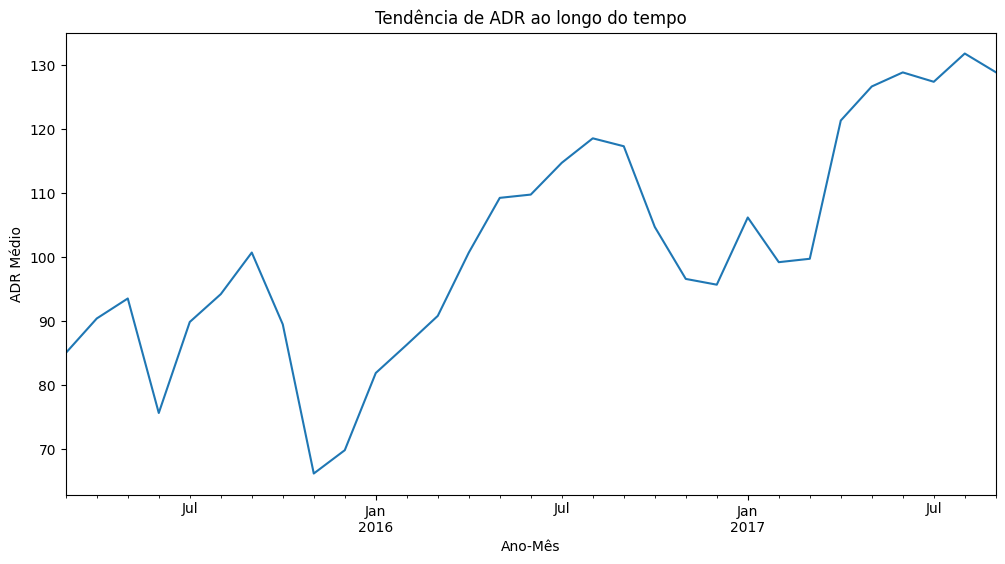

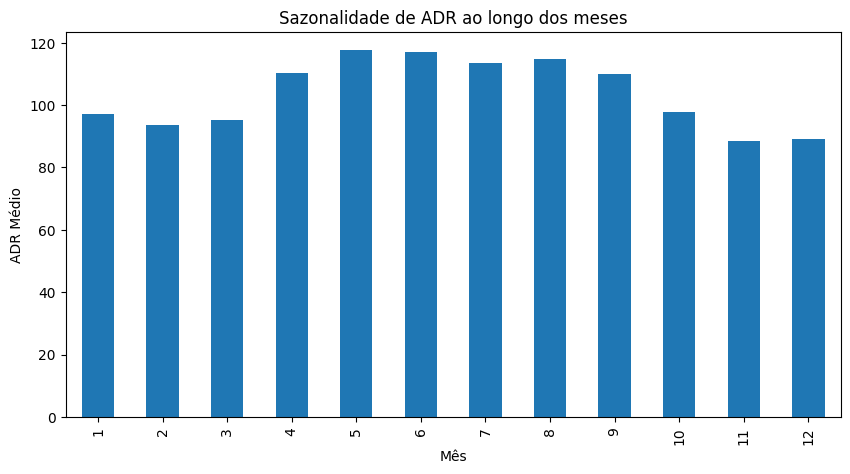

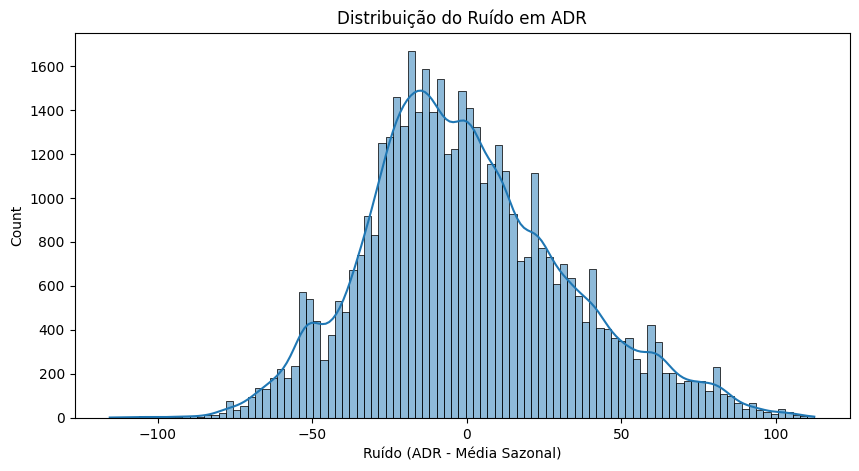

In [ ]:
# Converter `reservation_status_date` para datetime, se necessário
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Agrupar por mês e ano para análise de tendência e sazonalidade
df['year_month'] = df['reservation_status_date'].dt.to_period('M')

# TENDÊNCIA: Analisar a média de ADR ao longo do tempo
adr_trend = df.groupby('year_month')['adr'].mean()
plt.figure(figsize=(12, 6))
adr_trend.plot(title='Tendência de ADR ao longo do tempo | liner aditiva')
plt.xlabel('Ano-Mês')
plt.ylabel('ADR Médio')
plt.show()

# SAZONALIDADE: Analisar sazonalidade ao longo dos meses
monthly_adr = df.groupby(df['reservation_status_date'].dt.month)['adr'].mean()
plt.figure(figsize=(10, 5))
monthly_adr.plot(kind='bar', title='Sazonalidade de ADR ao longo dos meses')
plt.xlabel('Mês')
plt.ylabel('ADR Médio')
plt.show()

# RUÍDO: Calcular a diferença entre ADR e a média de cada mês para ver o ruído
df['adr_seasonal'] = df.groupby(df['reservation_status_date'].dt.month)['adr'].transform('mean')
df['adr_noise'] = df['adr'] - df['adr_seasonal']
plt.figure(figsize=(10, 5))
sns.histplot(df['adr_noise'], kde=True)
plt.title('Distribuição do Ruído em ADR')
plt.xlabel('Ruído (ADR - Média Sazonal)')
plt.show()

In [ ]:
# Copiando o DataFrame original
df_optimized = df.copy()

# Removendo colunas de data desnecessárias
df_optimized = df_optimized.drop(columns=['reservation_status_date'])

# Estratégia 1: Ajuste de ADR (diminuição do preço de diária de forma dinâmica)
df_optimized['adr'] = df_optimized['adr'] * 0.95  # Diminui 5% no preço da diária

# Estratégia 2: Menos trocas de quarto e mais estabilidade na reserva
df_optimized['reserved_room_type'] = df_optimized['reserved_room_type'].apply(lambda x: x if x != 'A' else 'B')
df_optimized['is_repeated_guest'] = df_optimized['is_repeated_guest'].apply(lambda x: 1 if x == 0 else x)

# Estratégia 3: Aumento de reservas com investimento em publicidade
df_optimized['total_of_special_requests'] = df_optimized['total_of_special_requests'] * 1.10

# Estratégia 4: Focar em canais de distribuição mais eficientes
df_optimized['distribution_channel'] = df_optimized['distribution_channel'].apply(lambda x: 1 if x == 1 else x)

# Estratégia 5: Aumentar a performance dos agentes de alta performance
top_agents = df_optimized.groupby('agent')['adr'].mean().sort_values(ascending=False).head(5).index
df_optimized['agent'] = df_optimized['agent'].apply(lambda x: x if x in top_agents else np.nan)

# Estratégia 6: Ajuste de refeições para pacotes de maior valor
df_optimized['meal'] = df_optimized['meal'].apply(lambda x: 1 if x == 0 else x)

# Estratégia 7: Reduzir dias na lista de espera
df_optimized['days_in_waiting_list'] = df_optimized['days_in_waiting_list'].apply(lambda x: max(0, x - 2))

Accuracy do modelo: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5425
           1       1.00      1.00      1.00      3696

    accuracy                           1.00      9121
   macro avg       1.00      1.00      1.00      9121
weighted avg       1.00      1.00      1.00      9121



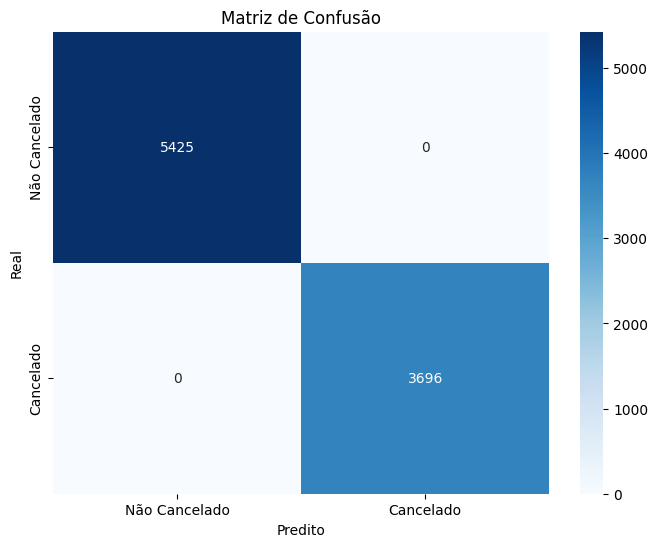

In [ ]:
# Preparando os dados
# Separando as features e o target
X = df.drop(columns=['is_canceled'])  # Features
y = df['is_canceled']  # Target

# Convertendo variáveis categóricas em variáveis numéricas (se necessário)
X = pd.get_dummies(X, drop_first=True)

# Dividindo em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy do modelo: {accuracy:.4f}')
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Plotando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelado', 'Cancelado'], yticklabels=['Não Cancelado', 'Cancelado'])
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 45603 entries, 2 to 119388
Series name: is_canceled
Non-Null Count  Dtype
--------------  -----
45603 non-null  int64
dtypes: int64(1)
memory usage: 712.5 KB


In [ ]:
# 1. Preprocessamento: Alinhando as colunas de df_optimized com as de df
# Fazendo a transformação de 'get_dummies' em df_optimized, mas mantendo a correspondência com X_train
X_optimized = df_optimized.drop(columns=['is_canceled'])  # Removendo 'is_canceled'
X_optimized = pd.get_dummies(X_optimized, drop_first=True)

# 2. Alinhando as colunas entre X_train e X_optimized
# Pegamos as colunas de X_train para garantir que X_optimized tenha as mesmas colunas
X_optimized = X_optimized.reindex(columns=X.columns, fill_value=0)

# 3. Prevendo as reservas canceladas no df_optimized com o modelo treinado
y_optimized_pred = model.predict(X_optimized)

# 4. Atualizando a coluna 'is_canceled' em df_optimized com as previsões
df_optimized['is_canceled'] = y_optimized_pred



    is_canceled
2             0
9             0
16            0
24            0
26            0


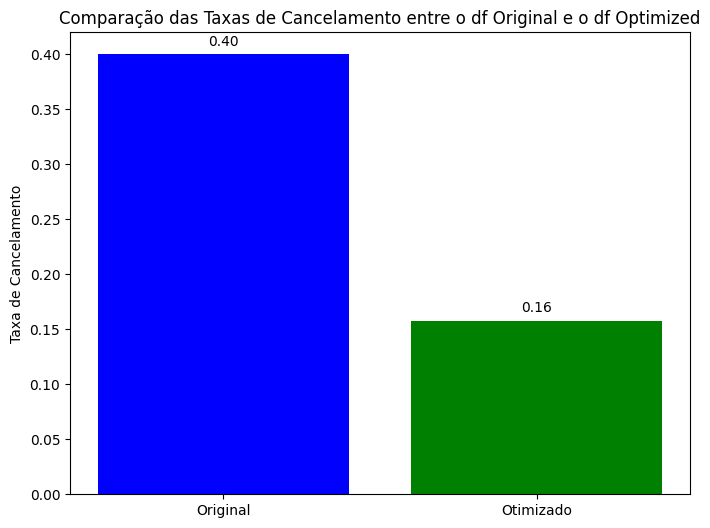

In [ ]:
original_cancellation_rate = df['is_canceled'].mean()
optimized_cancellation_rate = df_optimized['is_canceled'].mean()

plt.figure(figsize=(8, 6))
bars = plt.bar(['Original', 'Otimizado'],
               [original_cancellation_rate, optimized_cancellation_rate],
               color=['blue', 'green'])

plt.ylabel('Taxa de Cancelamento')
plt.title('Comparação das Taxas de Cancelamento entre o df Original e o df Optimized')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom')

plt.show()